# Streaming Services
*by Jorge Garcia*

## Table of Contents
1. [About this Project](#about-this-project)
2. [The data](#the-data)
    1. [Unifying the data](#unifying-the-data)
    2. [Data Cleaning](#data-cleaning)
3. [Initial EDA](#initial-eda)

## About this Project <a class = "anchor" id="about-this-project"></a>

While browsing some datasets on [Kaggle](https://kaggle.com), some datasets by the user [Shivam Bansal](https://www.kaggle.com/shivamb) peeked my interest. I decided to perform some Exploratory Data Analysis. 

The data was last updated on 2021, which is not ideal. However, the data can be used to create predictions that can then be validated with modern data. More specifically, any possible trends in streaming content, which today has shifted due to the market shifts, but more importantly, by the Writers and Actors Strike of 2023.

The question to answer is: In the data of streaming services, were there indicators


## The data <a class = "anchor" id="the-data"></a>

In [1]:
# Initializing libraries and reading csv files
from numpy import NaN,zeros
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

amazon = pd.read_csv('data/amazon_prime_titles.csv')
disney = pd.read_csv('data/disney_plus_titles.csv')
hulu   = pd.read_csv('data/hulu_titles.csv')
netflix= pd.read_csv('data/netflix_titles.csv')

### Unifying the data <a class = "anchor" id="unifying-the-data"></a>
All of the datasets have the same format, with the same column names and variable types. In order to create visualizations comparing each streaming platform to each other, we can join these datasets into a single, master dataset.

To do this we will complete 3 steps:
1. Add a new column to each DataFrame with the information of the streaming platform.
2. Modify the values of the "show id" column to ensure they are unique once all DataFrames are joined together.
3. Concatenate DataFrames into a single, master DataFrame.

In [2]:
# STEP 1: Add "streaming_platform" column to dataframes
amazon["streaming_platform"] = 'amazon prime'
disney["streaming_platform"] = 'disney plus'
hulu["streaming_platform"]   = 'hulu'
netflix["streaming_platform"]= 'netflix'

# STEP 2: Modify "show_id" columns
amazon['show_id']   = 'am' + amazon["show_id"]
disney['show_id']   = 'di' + disney["show_id"]
hulu['show_id']     = 'hu' + hulu["show_id"]
netflix['show_id']  = 'ne' + netflix["show_id"]

# STEP 3: Concatenate all DataFrames

streaming_platforms = pd.concat(objs=[amazon,disney,hulu,netflix],axis=0).reset_index(drop=True)

streaming_platforms.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,streaming_platform
22993,nes8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",netflix
22994,nes8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",netflix
22995,nes8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,netflix
22996,nes8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",netflix
22997,nes8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,netflix


### Data Cleaning <a class = "anchor" id="data-cleaning"></a>

Now that we have a single dataframe, we can correct some of the data formats to make it more usable. To do this we will **redefine column types** and **normalize data contents**. Here is the full list of edits made for each column:

1. "cast", "listed_in", "country"
    - these columns include lists of values as a single string, they were changed from str type to list type
2. "date added" and "release year"
    - change date added to datetime format and release year to int
3. "duration"
    - erased " min" from the data values, changed type to int

In [3]:
from functions import str_to_list

#Change Cast & listed_in columns from string to list:
streaming_platforms = str_to_list(streaming_platforms,"cast")
streaming_platforms = str_to_list(streaming_platforms,"listed_in")
streaming_platforms = str_to_list(streaming_platforms,"country")

#Change date added and release year to date formats
streaming_platforms["date_added"] = pd.to_datetime(streaming_platforms["date_added"])
streaming_platforms["release_year"] = pd.to_numeric(streaming_platforms["release_year"])

#Erase unnecessary information from run time, converted data type to int
streaming_platforms["duration"].replace("nan",NaN)
new_duration = []
for duration in streaming_platforms["duration"].values:
    new_duration.append(str(duration).split(" ")[0])

streaming_platforms["duration"] = pd.to_numeric(pd.Series(new_duration),errors='coerce')



In [4]:
#Clean Data frame ready for analysis
streaming_platforms.dtypes

show_id                       object
type                          object
title                         object
director                      object
cast                          object
country                       object
date_added            datetime64[ns]
release_year                   int64
rating                        object
duration                     float64
listed_in                     object
description                   object
streaming_platform            object
dtype: object

### Initial EDA <a class = "anchor" id="initial-eda"></a>

As an initial exploration of the data, lets create some initial indicators. First, the global top 20 countries that have content published on these platforms.

In [5]:
from functions import flatten

top_20_countries = flatten(streaming_platforms["country"].values).value_counts()[1:21]
top_20_countries

United States     6305
India             1299
United Kingdom    1174
Canada             645
Japan              615
France             475
Germany            293
South Korea        260
Spain              258
Australia          225
Mexico             185
China              184
Italy              126
Egypt              119
Hong Kong          113
Turkey             113
Belgium            109
Brazil             104
Nigeria            103
Argentina           97
dtype: int64

In [6]:
df1 = pd.DataFrame(index=top_20_countries.index.values,columns=["amazon prime","disney plus","hulu","netflix"])

countries = []
platforms = []
for row in streaming_platforms[["country","streaming_platform"]].values:
    for value in row[0]:
        countries.append(value)
        platforms.append(row[1])

df=pd.DataFrame()
df["countries"] = countries
df["platform"] = platforms

search = df.value_counts()

for country in top_20_countries.index.values:
    for platform in ["amazon prime","disney plus","hulu","netflix"]:
        try:
            df1.at[country,platform] = int(search[country][platform])
        except:
            df1.at[country,platform] = 0

df1 = df1.apply(pd.to_numeric).sort_values(by="netflix",ascending=True)

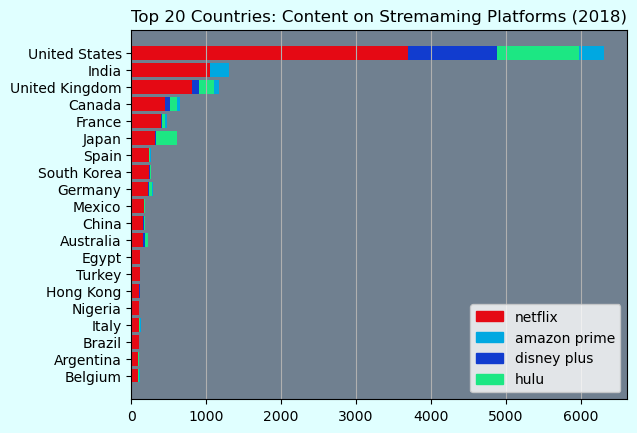

In [7]:
fig,ax = plt.subplots()

colors = {"netflix":"#E50914","amazon prime":"#00A8E1","disney plus":"#113CCF","hulu":"#1ce783"}
left = zeros(20)

for platform in ["netflix","disney plus","hulu","amazon prime"]:
    ax.barh(
        y=df1.index.values,
        width = df1[platform].values,
        left = left,
        color = colors[platform]
        )
    left = left +  df1[platform].values

#Customization:
#region

ax.set_title("Top 20 Countries: Content on Stremaming Platforms (2018)")
ax.grid(which="both",axis="x")
fig.patch.set_facecolor("lightcyan")
ax.patch.set_facecolor("slategrey")

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

#endregion